In [1]:
import logging
import gensim
from gensim.models import word2vec, KeyedVectors
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import pkuseg
import numpy as np
from nltk.tokenize import MWETokenizer
import itertools
from gensim.models import KeyedVectors
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence
from sklearn.manifold import TSNE

In [2]:
model = KeyedVectors.load_word2vec_format('清洗后文本.txt')

In [3]:
# 获取所有词的词向量
word_vectors = model.vectors


In [4]:
tsne = TSNE(n_components=2, random_state=42)
word_vectors_tsne = tsne.fit_transform(word_vectors)

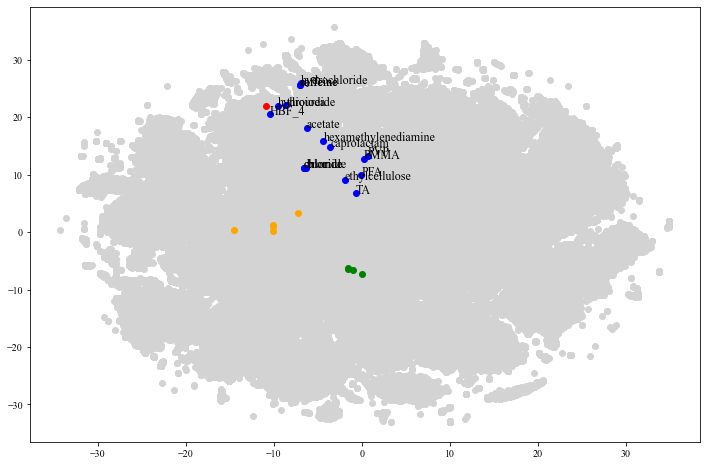

In [34]:
# 游老师那边的smart guess
word_vectors = {}
for i, word in enumerate(model.index_to_key):
    word_vectors[word] = model.get_vector(word)
    
plt.figure(figsize=(12, 8))
dpi=2000
# 绘制除高亮词汇外的点
plt.scatter(word_vectors_tsne[:, 0], word_vectors_tsne[:, 1], color='lightgray')

# 定义不同集合的高亮词汇和颜色
# highlight_words_blue = ['decane','Butane','hexamethylenediamine','octane','chloride','bromide','chloride','hydroiodide','acetamide','formamide','HBF_4','hydrochloride','acetate','water','caffeine','caprolactam','ethylcellulose','Formamide',] 
highlight_words_blue = ['TA','PMMA','caffeine','thiourea','PVP','PFA','hexamethylenediamine','chloride','bromide','chloride','hydroiodide','HBF_4','hydrochloride','acetate','caffeine','caprolactam','ethylcellulose'] 
# 添加剂，KI，NaF，ZnCl2,MgI2,NiCl2,Trimesic acid (TA),Ethyl cellulose (EC),Poly(methyl methacrylate) (PMMA),Caffeine,DR3T,
highlight_words_red = ['aminoguanidine',]  # 红色高亮词汇
highlight_words_yellow = []  # 黄色高亮词汇 有机无机杂化钙钛矿
highlight_words_green = ['FAPbI_3','MAPbI_3','MAPbBr_3','CsPbBr_3'] 
highlight_words_orange = ['SnO_2','TiO_2','ZnO','Nb_2O_5','LiF'] #
# highlight_words_orange = ['SiO_2','MgO','La_2O_3','Cr_2O_3']  
# 遍历蓝色高亮词汇并绘制点
for word in highlight_words_blue:
    index = list(word_vectors.keys()).index(word)
    plt.scatter(word_vectors_tsne[index, 0], word_vectors_tsne[index, 1], color='blue')
    plt.annotate(word, (word_vectors_tsne[index, 0], word_vectors_tsne[index, 1]), fontsize=12)

# 遍历红色高亮词汇并绘制点
for word in highlight_words_red:
    index = list(word_vectors.keys()).index(word)
    plt.scatter(word_vectors_tsne[index, 0], word_vectors_tsne[index, 1], color='red')
    # plt.annotate(word, (word_vectors_tsne[index, 0], word_vectors_tsne[index, 1]), fontsi/ze=12)

for word in highlight_words_green:
    index = list(word_vectors.keys()).index(word)
    plt.scatter(word_vectors_tsne[index, 0], word_vectors_tsne[index, 1], color='green')
    # plt.annotate(word, (word_vectors_tsne[index, 0], word_vectors_tsne[index, 1]), fontsize=12)
for word in highlight_words_orange:
    index = list(word_vectors.keys()).index(word)
    plt.scatter(word_vectors_tsne[index, 0], word_vectors_tsne[index, 1], color='orange')
    # plt.annotate(word, (word_vectors_tsne[index, 0], word_vectors_tsne[index, 1]), fontsize=12)
# plt.xlim(-20,10)
# plt.ylim(0,30)
plt.rcParams['font.family'] = 'Times New Roman' 
plt.savefig('聚类smartguess.png')  # 保存为PNG格式
plt.show()
# 删除了：

In [163]:

related_words = model.most_similar("aminoguanidine", topn=1000)# 打印选择的向量名
for word in related_words:
    print(word)

('thiocarbohydrazides', 0.7505018711090088)
('S-arylisothiuronium', 0.7504158616065979)
('sodioacetoacetic', 0.7485653162002563)
('p-dimethylaminobenzaldehyde', 0.747342050075531)
('gramine', 0.7473315596580505)
('triaminoguanidine', 0.7473315000534058)
('2-thiophenealdehyde', 0.7444431781768799)
('3-thiadiazoles', 0.7430548071861267)
('2-formylcyclohexanone', 0.7427387237548828)
('iodomethylates', 0.7427186965942383)
('α-hydrohexafluoroisobutyric', 0.7394216060638428)
('5-nitrofurfural', 0.738760232925415)
('benzalazine', 0.7380215525627136)
('hexafluoroisobutenylidene', 0.7370886206626892)
('POC1_3', 0.7362899780273438)
('-4-aza-5', 0.7357581257820129)
('ethyldichlorophosphine', 0.7356185913085938)
('iodohydrin', 0.7348514795303345)
('nitrosated', 0.7347450256347656)
('p-phenolatothianium', 0.7346543669700623)
('5-bromoisatin', 0.734537661075592)
('sulfotrioxidation', 0.7340051531791687)
('p-toluenesulfonyl', 0.7339895963668823)
('3-phenyl-5-', 0.7332537770271301)
('2-dithiolium', 0.